2.1	Description of the dataset features

Features:

Diabetic (Binary): Indicates whether a patient has been diagnosed with diabetes (1 for yes, 0 for no).

Alcohol Level (Continuous): Measures the alcohol consumption level of patients, possibly reflecting lifestyle choices.

Heart Rate (Continuous): Denotes the number of heartbeats per minute, a critical indicator of cardiovascular health.

Blood Oxygen Level (Continuous): The saturation of oxygen in the blood, a vital sign of respiratory function.

Body Temperature (Continuous): The measured temperature of the body in Celsius, indicating potential fever or hypothermia.

Weight (Continuous): The mass of the patient in kilograms, a fundamental measure of health.

MRI Delay (Continuous): The time delay in obtaining an MRI scan, potentially indicative of the progression or severity of medical conditions.

Prescription: The specific medication prescribed to the patient, relevant for treatment analysis.

Dosage in mg (Continuous): The amount of medication prescribed, critical for dosage-effect studies.

Age (Continuous): The age of the patient, an essential demographic factor.

Education_Level: The highest level of education attained by the patient, which may correlate with health literacy.

Dominant_Hand: Indicates the dominant hand of the patient, which could relate to neurological functions.

Gender: The gender of the patient, a key demographic characteristic.

Family_History: Indicates a family history of dementia, a significant risk factor.

Smoking_Status: Reflects the patient's smoking habits, an important lifestyle indicator.

APOE_ε4: Shows the presence of the APOE ε4 allele, a genetic variant associated with Alzheimer's disease.

Physical_Activity: The level of physical activity of the patient, highlighting lifestyle impacts on health.

Depression_Status: Indicates whether the patient has depression, which can be related to cognitive health.

Cognitive_Test_Scores (Continuous): Scores from cognitive tests, direct measures of cognitive function.

Medication_History: Records whether the patient has a history of medication use, relevant for drug interactions.

Nutrition_Diet: Describes the patient's diet, an important health factor.

Sleep_Quality: Assesses the quality of the patient's sleep, a critical aspect of health.

Chronic_Health_Conditions: Notes any chronic health conditions the patient has, key for comorbidity studies.

Dementia (Binary): Serves as the target variable, indicating the presence (1) or absence (0) of dementia.

#### This dataset serves as a rich source for analysis, providing a multifaceted view of factors that may contribute to the onset and progression of dementia. It is a valuable resource for researchers looking to explore the complex interplay between lifestyle, genetics, and health outcomes. From PUBMED, Online research sources, NHS, Google scholar and consultation with healthcare professionals.


In [1]:
import numpy as np # linear About Dataset
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, precision_recall_curve, average_precision_score

Data Load (Ingestion)

In [2]:
# https://www.kaggle.com/datasets/timothyadeyemi/dementia-patient-health-dataset?resource=download

df = pd.read_csv("dementia_patients_health_data.csv")

In [3]:
df.dtypes

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object

In [4]:
df.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [5]:
# AttributeError: module 'pandas.api.types' has no attribute 'is_any_real_numeric_dtype'
Numerical_columns = []
for column in df.columns:
    if df[column].dtype == 'int64' or pd.api.types.is_any_real_numeric_dtype(df[column]):
        Numerical_columns.append(column)
print("Numerical Columns :", Numerical_columns,
     "\nNumber Of Columns :", len(Numerical_columns))

Numerical Columns : ['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'MRI_Delay', 'Dosage in mg', 'Age', 'Cognitive_Test_Scores', 'Dementia'] 
Number Of Columns : 11


2.2.1	Replacing of missing values

Data Cleaning

In [6]:
df.isna().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [7]:
df["Prescription"].fillna("None", inplace=True)
df["Dosage in mg"].fillna(0, inplace=True)
df["Chronic_Health_Conditions"].fillna("None", inplace=True)

In [8]:
pd.set_option("display.max_columns", None)

In [9]:
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,None,0.0,60,Primary School,Left,Female,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,Secondary School,Right,Male,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,None,0.0,69,Primary School,Right,Male,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,Secondary School,Left,Female,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,Secondary School,Right,Male,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


Exploratory Data Analyse

We can see the distributions of the numeric columns and the relationship of the categorical columns with Dementia.

Notable points for are that:

Higher Oxygen levels led to lower chances of getting Dementia.

Prescribed people are highly likely to get Dementia (Side effects of drugs).

Family History of Dementia led to lower chances of getting Dementia (Probably to due Awareness).

Presence of the APOE ε4 allele is likely to cause Dementia.

Depression is likely to lead to Dementia.

Lower Cognitive Test Scores also indicate high chances of Dementia.

Presence of Diabetes is also likely to lead to Dementia.

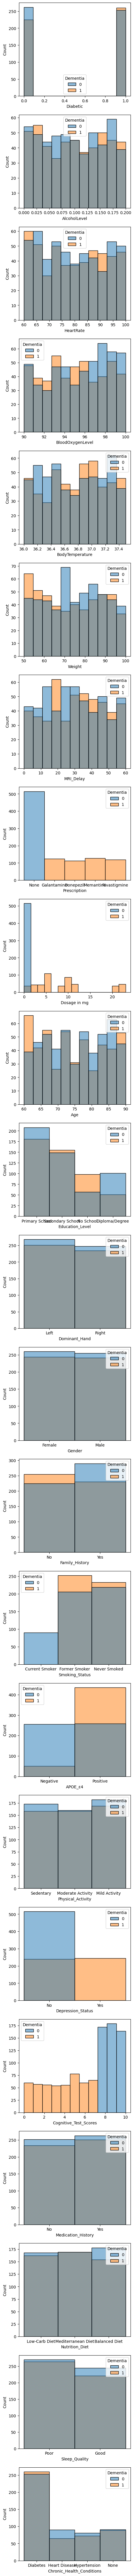

In [10]:
plt.figure(figsize=(5,len(df.columns)*5))
count = 0
for col in df.drop('Dementia', axis=1).columns:
    count += 1
    plt.subplot(len(df.columns), 1, count)
    sns.histplot(x=col, hue='Dementia', data=df)

2.2.2	Label Encoding and Feature Scaling

The data has been processed through Label Encoding (to convert Categorical columns to numeric for model understanding) and Feature Scaling (to scale down numeric values from 0 to 1, as that makes it easier for the model to understand)

In [11]:
cats = ["Prescription", "Education_Level", "Dominant_Hand", "Gender", "Family_History", "Smoking_Status", "APOE_ε4",
       "Physical_Activity", "Depression_Status", "Medication_History", "Nutrition_Diet", "Sleep_Quality",
       "Chronic_Health_Conditions"]

le = LabelEncoder()
for i in cats:
    df[i] = le.fit_transform(df[i])

In [12]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaling = MinMaxScaler()
x = scaling.fit_transform(x)

In [13]:
df.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,3,0.0,60,2,0,0,0,0,0,2,0,10,0,1,1,0,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,1,12.0,61,3,1,1,0,1,1,1,0,1,1,1,1,1,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,3,0.0,69,2,1,1,1,1,0,1,0,8,0,2,1,1,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,0,23.0,78,3,0,0,1,2,0,0,1,5,1,0,1,2,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,2,20.0,77,3,1,1,1,2,1,0,0,0,1,1,0,0,1


In [14]:
df.corr()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
Diabetic,1.000000,-0.025616,-0.007188,-0.016575,-0.053851,-0.007501,-0.020378,-0.040870,0.049210,0.000923,-0.032295,-0.083100,0.022216,-0.023066,0.013401,0.025953,-0.006640,0.015421,-0.050019,-0.006733,0.009586,-0.055916,-0.871307,0.044815
AlcoholLevel,-0.025616,1.000000,-0.046341,-0.005562,0.030854,0.034553,0.004160,0.003555,0.008300,-0.003081,0.018120,-0.009488,0.045931,0.059860,0.016359,0.033830,0.026795,-0.002874,-0.018716,-0.058951,-0.002473,0.033801,0.066178,-0.003720
HeartRate,-0.007188,-0.046341,1.000000,0.022283,0.015585,-0.001730,0.000169,-0.008638,-0.020054,0.011665,-0.016396,-0.039069,0.051075,0.037189,-0.007302,0.061900,0.006472,-0.003235,0.005493,0.027799,0.049843,0.003392,0.010527,0.012276
BloodOxygenLevel,-0.016575,-0.005562,0.022283,1.000000,-0.007265,-0.041081,-0.005760,0.026456,-0.062321,0.029565,0.019685,-0.009602,-0.003194,-0.064895,-0.028457,-0.008023,-0.057923,-0.046504,0.070218,0.015129,0.009316,0.017862,0.025110,-0.071454
BodyTemperature,-0.053851,0.030854,0.015585,-0.007265,1.000000,-0.017750,0.015953,-0.039202,0.045258,0.001586,-0.065518,-0.018718,0.022369,0.042260,-0.008126,0.061852,-0.005957,0.022563,-0.009791,0.022006,-0.030964,0.011410,0.052163,0.033928
Weight,-0.007501,0.034553,-0.001730,-0.041081,-0.017750,1.000000,-0.022890,0.010197,-0.029248,0.011739,-0.024054,-0.003709,-0.015875,0.062007,-0.010713,-0.080600,0.022822,-0.032482,0.035821,-0.057993,0.023790,0.005504,0.004676,-0.049563
MRI_Delay,-0.020378,0.004160,0.000169,-0.005760,0.015953,-0.022890,1.000000,0.000373,-0.035924,-0.002093,-0.068276,0.006767,0.001984,0.018155,0.019007,-0.014357,-0.025660,0.052370,-0.052227,0.038864,-0.002350,0.002877,-0.013202,0.031251
Prescription,-0.040870,0.003555,-0.008638,0.026456,-0.039202,0.010197,0.000373,1.000000,-0.678369,0.023096,-0.020386,0.017954,0.033069,0.079260,-0.095396,-0.252492,0.012297,-0.297012,0.448011,0.025934,-0.040602,0.027607,0.017074,-0.519613
Dosage in mg,0.049210,0.008300,-0.020054,-0.062321,0.045258,-0.029248,-0.035924,-0.678369,1.000000,-0.050452,0.054969,0.002064,-0.010194,-0.067373,0.107107,0.310795,-0.002653,0.409195,-0.619073,-0.024600,0.012536,0.015638,-0.029416,0.713842
Age,0.000923,-0.003081,0.011665,0.029565,0.001586,0.011739,-0.002093,0.023096,-0.050452,1.000000,0.014298,-0.065995,0.045022,0.071085,-0.016421,-0.017701,0.021607,-0.018278,0.062640,-0.050559,0.085684,0.003336,0.016920,-0.062154


2.3	Correlation Heat Map

The heatmap shows the correlation between the different features, most noteworthy being the high positive relationship between Depression Status and Dementia and the high negative relationships between Cognitive Scores and Prescription with Dementia. 
The odd one being Prescription as it shows the more likely to have Dementia means less likely to have been prescribed medication.

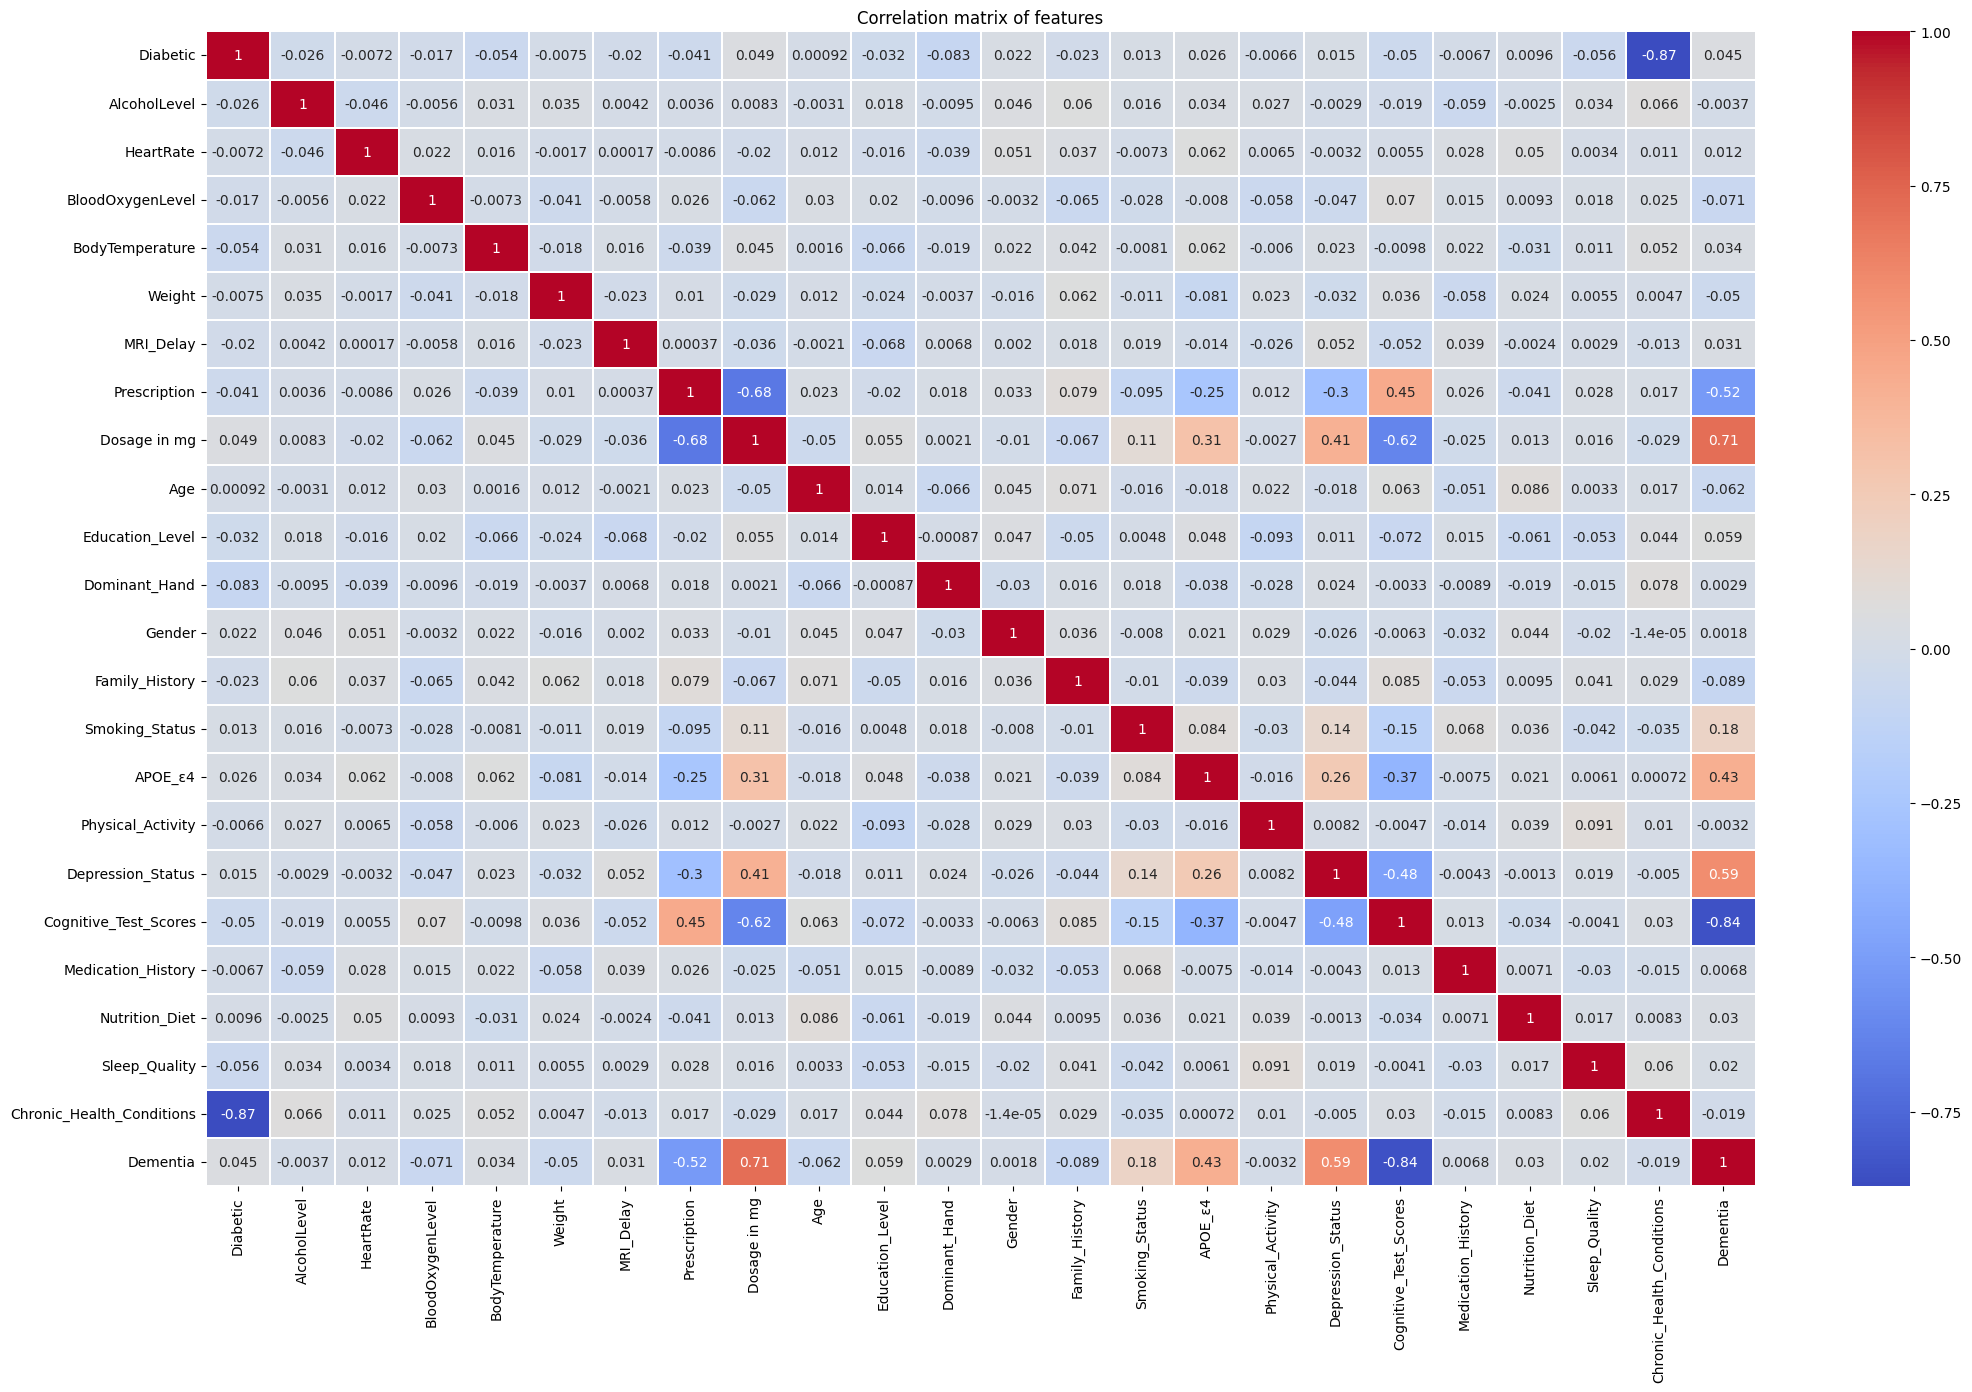

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr,annot=True, cmap = "coolwarm", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

Number Of Columns : 24

In [16]:
# calculate the class distribution and determine if the target variable is balanced:

# Load the dataset
df = pd.read_csv("dementia_patients_health_data.csv")
# Calculate class distribution
class_distribution = df["Dementia"].value_counts()

# Check if the target variable is balanced
is_balanced = len(class_distribution) > 1 and (class_distribution.max() / class_distribution.min()) <= 2

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Print if the target variable is balanced or not
if is_balanced:
    print("The target variable is balanced.")
else:
    print("The target variable is not balanced.")

Class Distribution:
Dementia
0    515
1    485
Name: count, dtype: int64
The target variable is balanced.


3.1	Models Training

Data Splitting

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

Models Traing

In [18]:
def training(model, name, ax):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    # Calculating  accuracy score
    accuracy = accuracy_score(y_test, pred)
    # Calculating precision score
    precision = precision_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns_plot = sns.heatmap(cm, annot=True, ax=ax)

    ax.set_title("{}: acc {}% prec {}%".format(name, round(accuracy*100, 2), round(precision*100, 2) ))

In [19]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier(learning_rate=0.9)
abc = AdaBoostClassifier(learning_rate=0.9)
svc = SVC(C=0.9)
xgb = XGBClassifier(learning_rate=0.9)
lgr = LogisticRegression(C=0.9)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
kNN = KNeighborsClassifier(n_neighbors=4)

models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

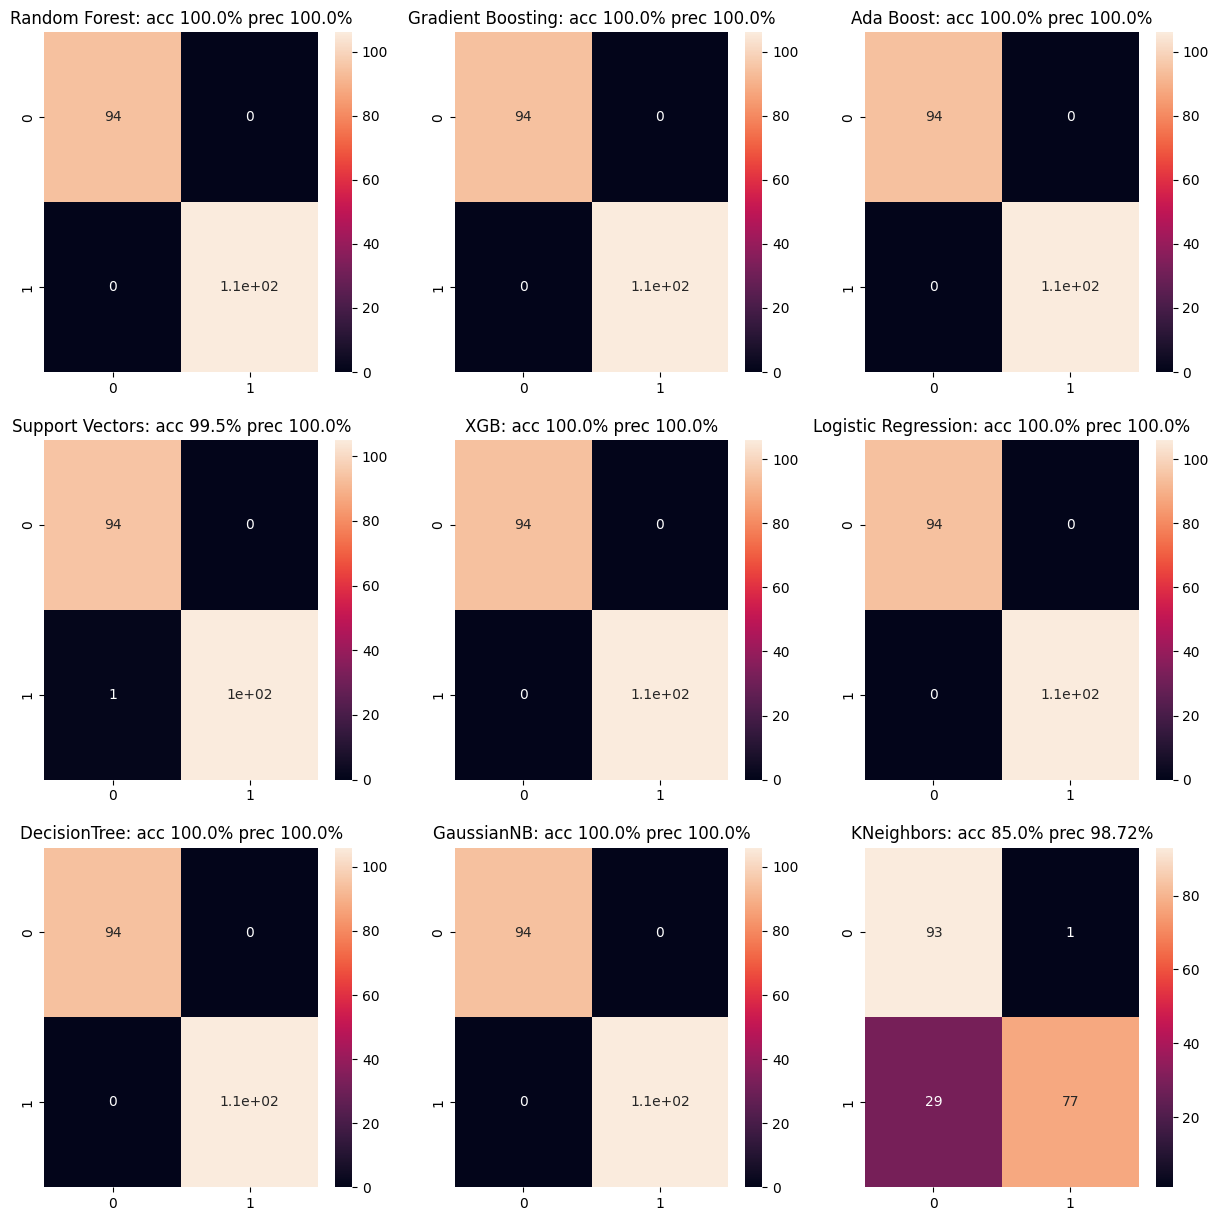

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
index = 0
for i in range(3):
    for j in range(3):
        training(models[index], names[index], axes[i][j])
        index += 1

plt.savefig ("ConfusionMatrix.png")

3.2 Accuracy Score 100 % - possible overfitting

3.3.1	MAE/RMSE

In [21]:
def test_model(model, x, y):
    mae_train = []
    mae_test = []
    x = pd.DataFrame(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))

    # folds = range(1, kf.get_n_splits() + 1)
    plt.plot(mae_train, 'o-', color='green', label='train')
    plt.plot(mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    #plt.savefig (str(model).strip()+".png")
    #plt.savefig (str(model).strip()+".png")
    plt.show()


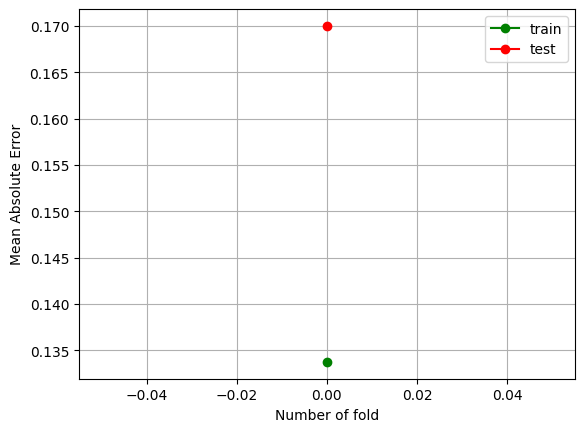

In [22]:
model = KNeighborsClassifier(n_neighbors=500)
test_model(model, x,y)

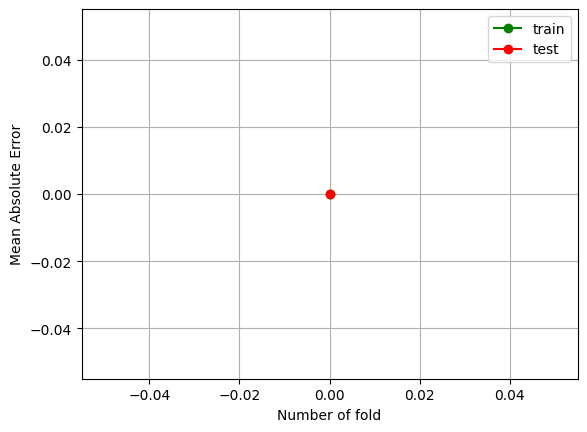

In [23]:
model = GaussianNB()
test_model(model, x,y)

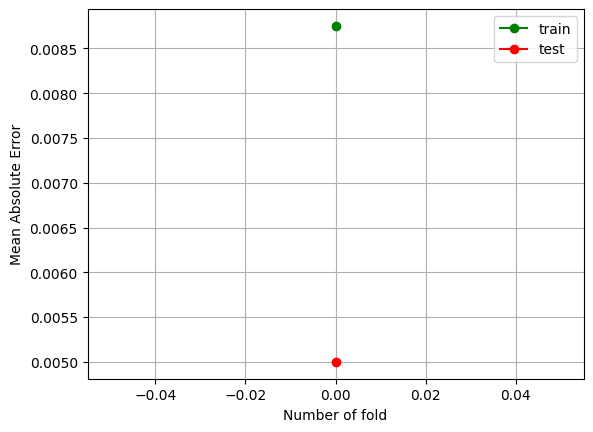

In [24]:
model = SVC(C=0.9)
test_model(model, x,y)

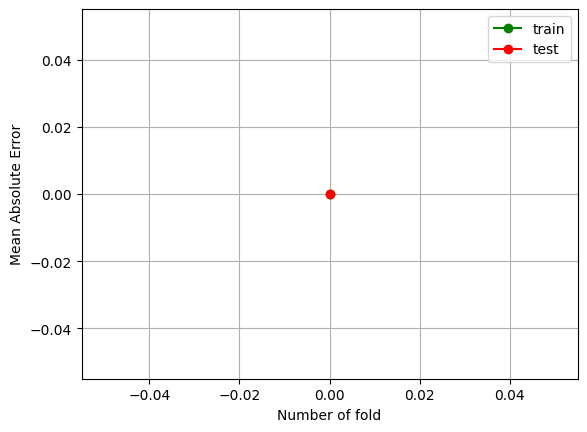

In [25]:
model = RandomForestClassifier()
test_model(model, x,y)

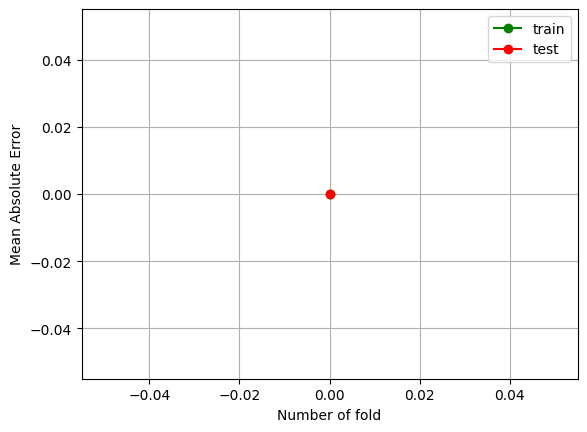

In [26]:
model = GradientBoostingClassifier(learning_rate=0.9)
test_model(model, x,y)

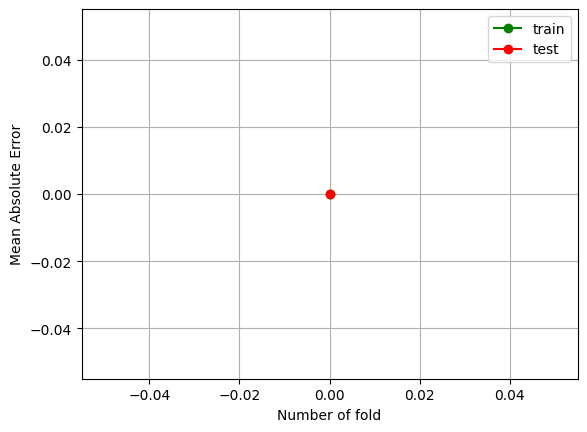

In [27]:
model = AdaBoostClassifier(learning_rate=0.9)
test_model(model, x,y)

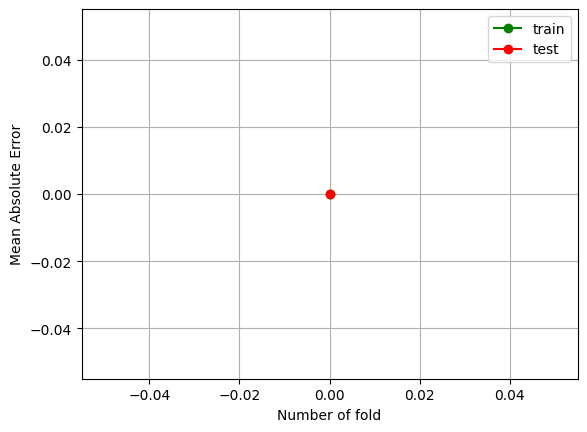

In [28]:
model = XGBClassifier(learning_rate=0.9)
test_model(model, x,y)

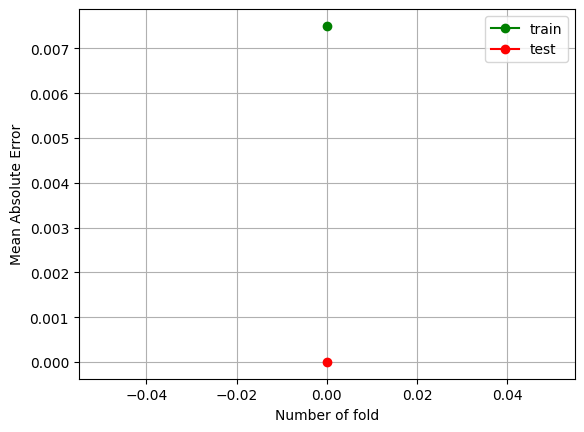

In [29]:
model = LogisticRegression(C=0.9)
test_model(model, x,y)

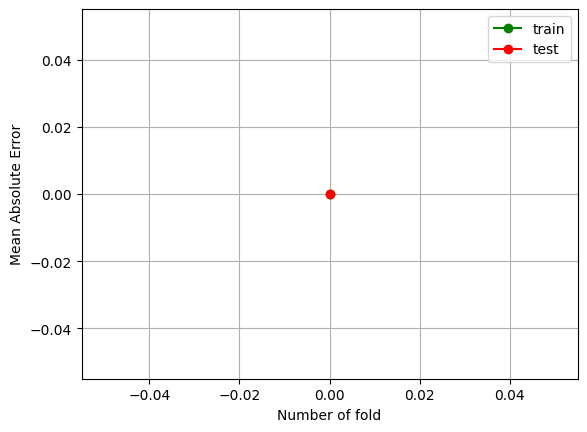

In [30]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
test_model(model, x,y)

In [31]:
def test_model(x, y):
    mae_train = []
    mae_test = []
    rmse_train = []
    rmse_test = []

    x = pd.DataFrame(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
    rfc = RandomForestClassifier()
    gbc = GradientBoostingClassifier(learning_rate=0.9)
    abc = AdaBoostClassifier(learning_rate=0.9)
    svc = SVC(C=0.9)
    xgb = XGBClassifier(learning_rate=0.9)
    lgr = LogisticRegression(C=0.9)
    gNB = GaussianNB()
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
    kNN = KNeighborsClassifier(n_neighbors=2)

    models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
    names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

    for model in models:
     model.fit(x_train, y_train)
     y_train_pred = model.predict(x_train)
     y_test_pred = model.predict(x_test)

     mae_train.append(mean_absolute_error(y_train, y_train_pred))
     mae_test.append(mean_absolute_error(y_test, y_test_pred))
     rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
     rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    metrics_gen = np.array([names, np.round(mae_train, 4), np.round(mae_test, 4), np.round(rmse_train, 4), np.round(rmse_test, 4)])

    df_metrics_gen = pd.DataFrame(metrics_gen, index=[' ', 'mean_train', 'mean_test', 'rmse_train', 'rmse_test'])

    #print (df_mae_gen.to_markdown())
    print (df_metrics_gen.to_markdown())

    plt.plot(mae_train, 'o-', color='green', label='mae_train')
    plt.plot(mae_test, 'o-', color='red', label='mae_test')

    plt.plot(rmse_train, 'o-', color='blue', label='rmse_train')
    plt.plot(rmse_test, 'o-', color='black', label='rmse_test')

    plt.legend()
    plt.grid()
    plt.xlabel('Models')
    plt.ylabel('Mean Absolute Error & RMSE')
    #plt.savefig ("Mean Absolute Error & RMSE without Regularisation Basic"+".png")
    plt.show()

|            | 0             | 1                 | 2         | 3               | 4   | 5                   | 6            | 7          | 8          |
|:-----------|:--------------|:------------------|:----------|:----------------|:----|:--------------------|:-------------|:-----------|:-----------|
|            | Random Forest | Gradient Boosting | Ada Boost | Support Vectors | XGB | Logistic Regression | DecisionTree | GaussianNB | KNeighbors |
| mean_train | 0.0           | 0.0               | 0.0       | 0.0088          | 0.0 | 0.0075              | 0.0          | 0.0        | 0.0888     |
| mean_test  | 0.0           | 0.0               | 0.0       | 0.005           | 0.0 | 0.0                 | 0.0          | 0.0        | 0.21       |
| rmse_train | 0.0           | 0.0               | 0.0       | 0.0935          | 0.0 | 0.0866              | 0.0          | 0.0        | 0.2979     |
| rmse_test  | 0.0           | 0.0               | 0.0       | 0.0707          | 0.0 | 0.0          

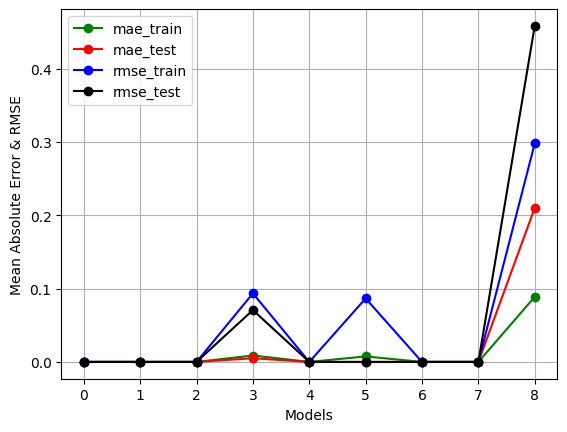

In [32]:
test_model(x, y)

3.3.2	MAE/RMSE with k-fold cross validation

In [33]:
from sklearn.model_selection import KFold

In [34]:
def test_model(model, x, y):
    kf = KFold(n_splits=4)

    mae_train = []
    mae_test = []
    rmse_train = []
    rmse_test = []

    x = pd.DataFrame(x)
    for train_index, test_index in kf.split(x):

        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.plot(rmse_train, 'o-', color='blue', label='rmse_train')
    plt.plot(rmse_test, 'o-', color='black', label='rmse_test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of folds')
    plt.ylabel('Mean Absolute Error & RMSE')
    plt.title (str(model).split('(')[0])
    plt.savefig (str(model).split('(')[0]+str(kf)+".png")
    plt.show()

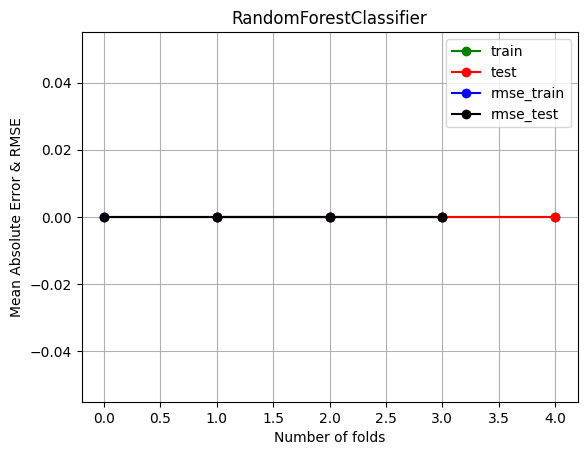

In [35]:
model = RandomForestClassifier()
test_model(model, x,y)

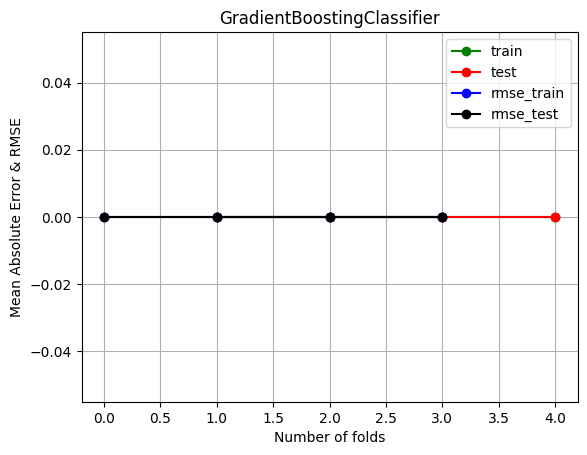

In [36]:
model = GradientBoostingClassifier(learning_rate=0.9)
test_model(model, x,y)

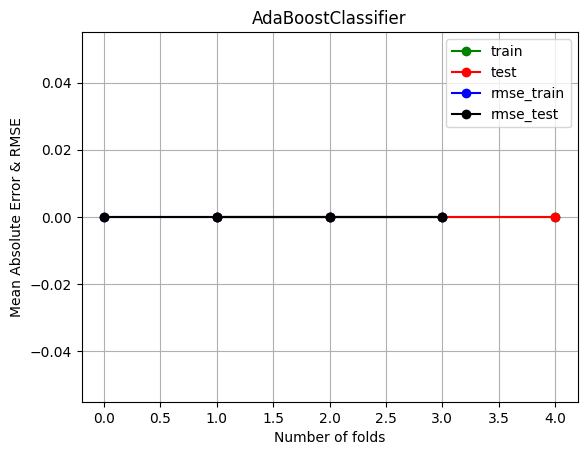

In [37]:
model = AdaBoostClassifier(learning_rate=0.9)
test_model(model, x,y)

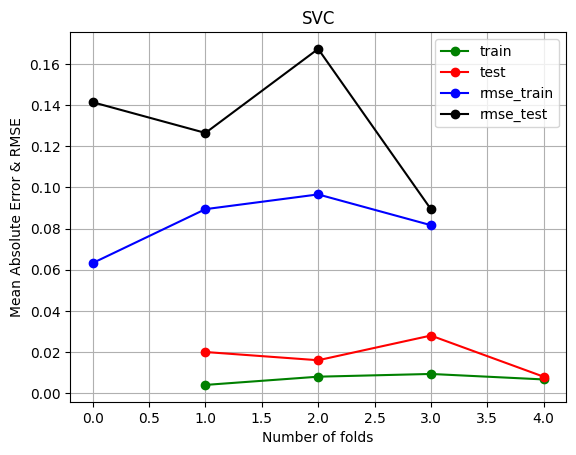

In [38]:
model = SVC(C=0.9)
test_model(model, x,y)

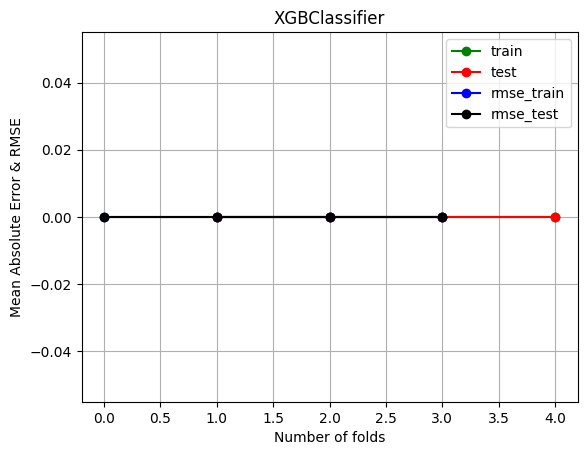

In [39]:
model = XGBClassifier(learning_rate=0.9)
test_model(model, x,y)

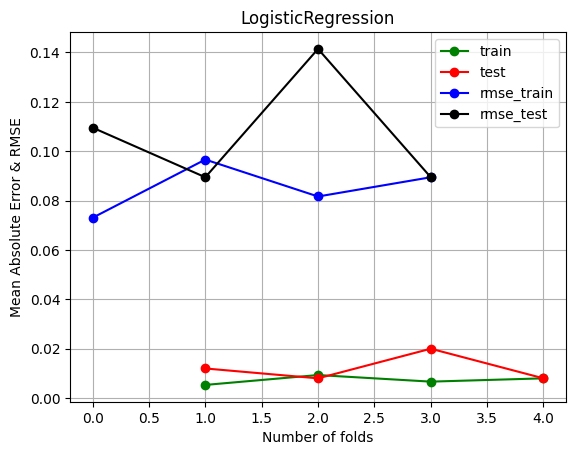

In [40]:
model = LogisticRegression(C=0.9)
test_model(model, x,y)

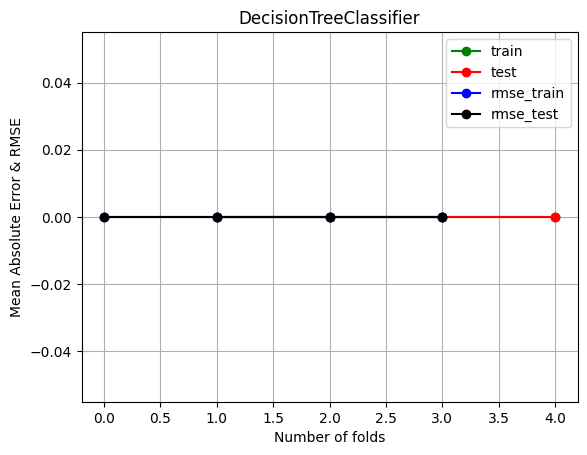

In [41]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
test_model(model, x,y)

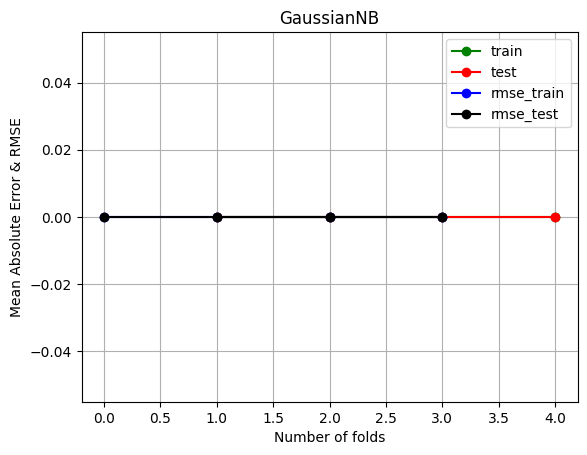

In [42]:
model = GaussianNB()
test_model(model, x,y)

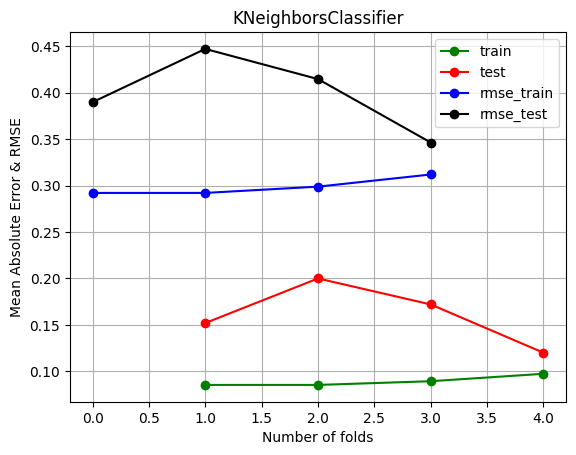

In [43]:
model = KNeighborsClassifier(n_neighbors=2)
test_model(model, x,y)

4.1	Regularization

In [89]:
def test_model_regular(x, y):
    mae_train = []
    mae_test = []
    rmse_train = []
    rmse_test = []

    x = pd.DataFrame(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

    rfc = RandomForestClassifier(n_estimators=100, max_depth=3,
                             min_samples_split=2, min_samples_leaf=1,
                             max_features=20)
    gbc = GradientBoostingClassifier(learning_rate=0.001, n_estimators=100, max_depth=3)
    abc = AdaBoostClassifier(learning_rate=0.001, n_estimators = 50, algorithm = "SAMME.R")
    svc = SVC(C=0.001, kernel='rbf', gamma=0.3)
    xgb = XGBClassifier(learning_rate = 0.001, n_estimators = 100, max_depth=2, gamma=2, eta=0.8, min_child_weight=1, subsample = 0.8 , reg_alpha=0.1, reg_lambda=1)
    lgr = LogisticRegression(penalty='l2', C=0.001)
    gNB = GaussianNB(var_smoothing=1e-9)
    dt = DecisionTreeClassifier(max_depth=5, min_samples_split=100, min_samples_leaf=50, random_state=42)
    kNN = KNeighborsClassifier(n_neighbors=4, metric="l1")

    models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
    names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

    for model in models:
     model.fit(x_train, y_train)
     y_train_pred = model.predict(x_train)
     y_test_pred = model.predict(x_test)
     mae_train.append(mean_absolute_error(y_train, y_train_pred))
     mae_test.append(mean_absolute_error(y_test, y_test_pred))
     rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
     rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    metrics_gen = np.array([names, np.round(mae_train, 4), np.round(mae_test, 4), np.round(rmse_train, 4), np.round(rmse_test, 4)])
    df_metrics_gen = pd.DataFrame(metrics_gen, index=[' ', 'mean_train', 'mean_test', 'rmse_train', 'rmse_test'])

    #print (df_mae_gen.to_markdown())
    print (df_metrics_gen.to_markdown())

    plt.plot(mae_train, 'o-', color='green', label='mae_train')
    plt.plot(mae_test, 'o-', color='red', label='mae_test')

    plt.plot(rmse_train, 'o-', color='blue', label='rmse_train')
    plt.plot(rmse_test, 'o-', color='black', label='rmse_test')

    plt.legend()
    plt.grid()
    plt.xlabel('Models')
    plt.ylabel('Mean Absolute Error & RMSE')
    plt.savefig ("Mean Absolute Error & RMSE Regularisation"+".png")
    plt.show()

|            | 0             | 1                 | 2         | 3               | 4   | 5                   | 6            | 7          | 8          |
|:-----------|:--------------|:------------------|:----------|:----------------|:----|:--------------------|:-------------|:-----------|:-----------|
|            | Random Forest | Gradient Boosting | Ada Boost | Support Vectors | XGB | Logistic Regression | DecisionTree | GaussianNB | KNeighbors |
| mean_train | 0.0           | 0.0               | 0.0       | 0.4738          | 0.0 | 0.2675              | 0.0          | 0.0        | 0.0662     |
| mean_test  | 0.0           | 0.0               | 0.0       | 0.53            | 0.0 | 0.3                 | 0.0          | 0.0        | 0.1        |
| rmse_train | 0.0           | 0.0               | 0.0       | 0.6883          | 0.0 | 0.5172              | 0.0          | 0.0        | 0.2574     |
| rmse_test  | 0.0           | 0.0               | 0.0       | 0.728           | 0.0 | 0.5477       

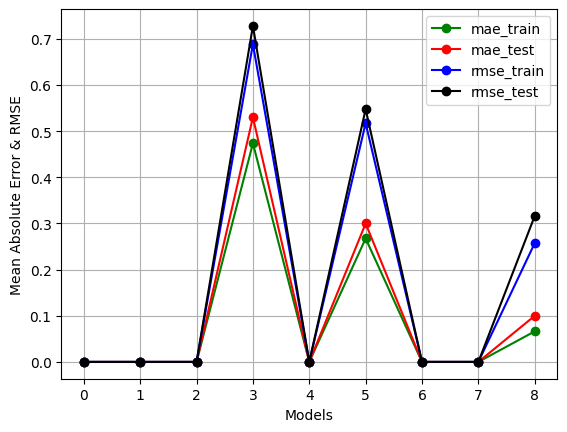

In [90]:
test_model_regular(x, y)

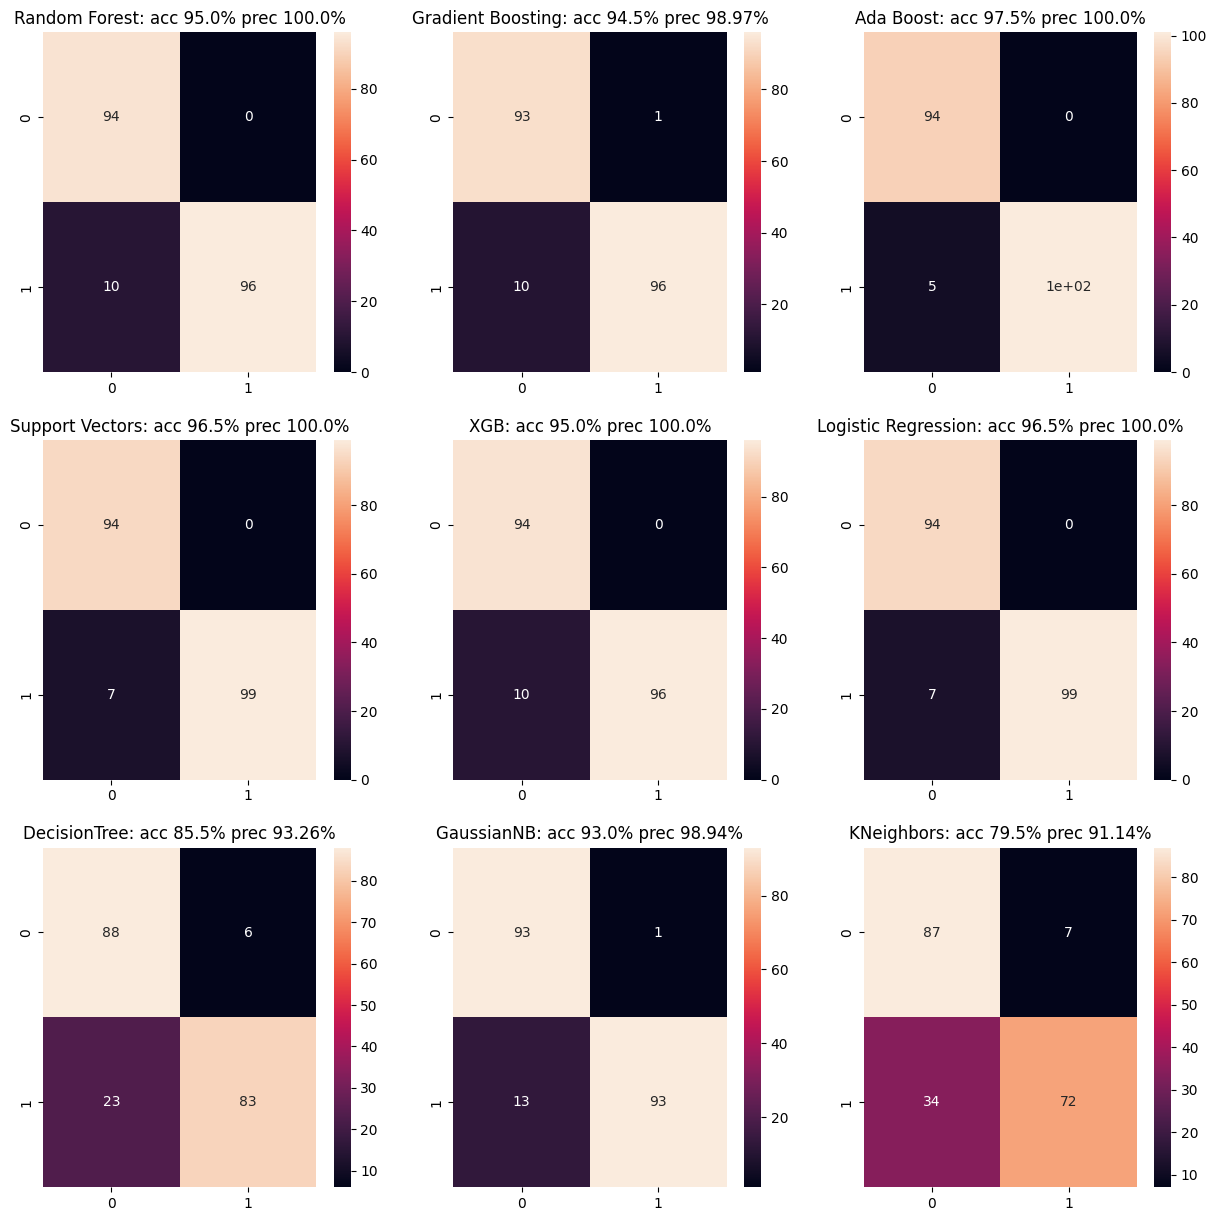

In [91]:
def training_pca10(model, name, ax):
    x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=42, test_size=0.2)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    # Calculating  accuracy score
    accuracy = accuracy_score(y_test, pred)
    # Calculating precision score
    precision = precision_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns_plot = sns.heatmap(cm, annot=True, ax=ax)

    ax.set_title("{}: acc {}% prec {}%".format(name, round(accuracy*100, 2), round(precision*100, 2) ))

    rfc = RandomForestClassifier(n_estimators=100, max_depth=3,
                             min_samples_split=2, min_samples_leaf=1,
                             max_features=20)
    gbc = GradientBoostingClassifier(learning_rate=0.001, n_estimators=100, max_depth=3)
    abc = AdaBoostClassifier(learning_rate=0.001, n_estimators = 50, algorithm = "SAMME.R")
    svc = SVC(C=0.001, kernel='rbf', gamma=0.3)
    xgb = XGBClassifier(learning_rate = 0.001, n_estimators = 100, max_depth=2, gamma=2, eta=0.8, min_child_weight=1, subsample = 0.8 , reg_alpha=0.1, reg_lambda=1)
    lgr = LogisticRegression(penalty='l2', C=0.001)
    gNB = GaussianNB(var_smoothing=1e-9)
    dt = DecisionTreeClassifier(max_depth=5, min_samples_split=100, min_samples_leaf=50, random_state=42)
    kNN = KNeighborsClassifier(n_neighbors=4, metric="l1")


models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
index = 0
for i in range(3):
    for j in range(3):
        training_pca10(models[index], names[index], axes[i][j])
        index += 1

plt.savefig ("ConfusionMatrix_PCA10.png")

4.2.1	Principal Component Analysis (dimensionality reduction using pca)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df = pd.DataFrame(x_pca)
df.head()

# print (x)
print("Transformed dataset size:", x_pca.shape)

Transformed dataset size: (1000, 2)


In [48]:
print(sum(pca.explained_variance_ratio_))

0.21294447927250865


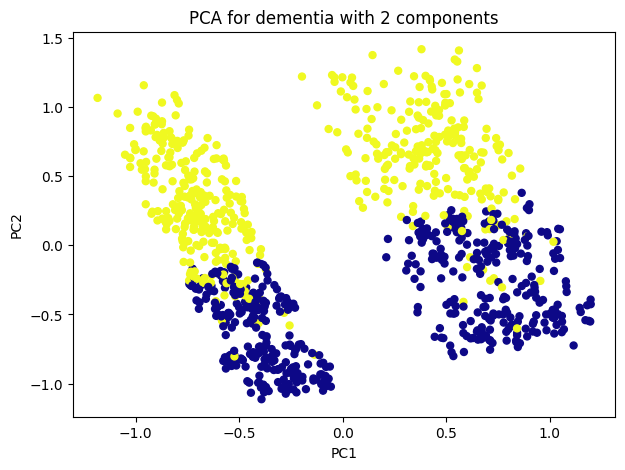

In [49]:
plt.figure(figsize=[7, 5])

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, s=25, cmap='plasma')
plt.title('PCA for dementia with 2 components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig("PCA.png")

In [50]:
exp_var = sum(pca.explained_variance_ratio_ * 100)
print('Variance explained:', exp_var)

Variance explained: 21.294447927250864


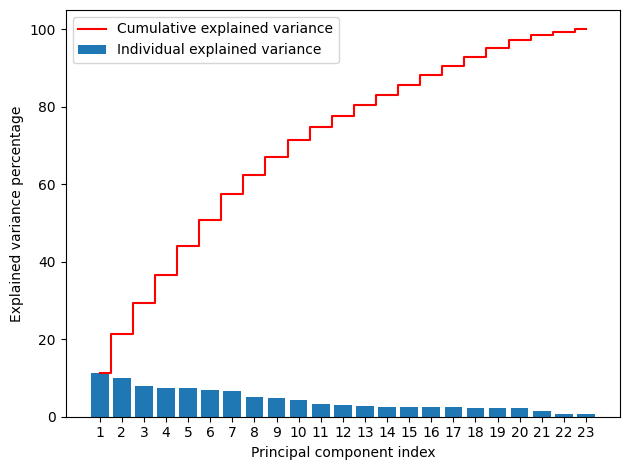

In [51]:
pca = PCA(n_components=None)
pca.fit(x)

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 24), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 24), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 24)))
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("pca_cumulative_explained_variance_plot.png")

In [52]:
print(sum(pca.explained_variance_ratio_))

1.0


PCA (n=10)

In [53]:
df = pd.read_csv("dementia_patients_health_data.csv")

df["Prescription"].fillna("None", inplace=True)
df["Dosage in mg"].fillna(0, inplace=True)
df["Chronic_Health_Conditions"].fillna("None", inplace=True)

cats = ["Prescription", "Education_Level", "Dominant_Hand", "Gender", "Family_History", "Smoking_Status", "APOE_ε4",
       "Physical_Activity", "Depression_Status", "Medication_History", "Nutrition_Diet", "Sleep_Quality",
       "Chronic_Health_Conditions"]

le = LabelEncoder()
for i in cats:
    df[i] = le.fit_transform(df[i])

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaling = MinMaxScaler()
x = scaling.fit_transform(x)

In [54]:
pca = PCA(n_components=10)
pca.fit(x)
x_pca = pca.transform(x)
x_pca = pd.DataFrame(x_pca)
# due to: ValueError: Negative values in data passed to MultinomialNB (input X)
# x_pca = scaling.fit_transform(x_pca)

In [55]:
print (x_pca)

            0         1         2         3         4         5         6  \
0   -0.341032 -0.842183 -0.043022  0.682161 -0.528553  0.887757  0.283698   
1    0.254061  0.708328  0.292467 -0.202792 -0.131774 -0.308183  0.957441   
2    0.777659 -0.558604 -0.676621  0.039677  0.400450 -0.135249  0.502180   
3    0.411300  0.674980  0.110847  0.473548 -0.512186 -0.405004 -0.609837   
4   -0.697532  0.261133  0.145283 -0.554348  0.698294 -0.826453 -0.026763   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.672343  0.025900 -0.997303 -0.051441 -0.105610  0.031846 -0.114182   
996 -0.403951 -0.733627  0.498818  0.503115 -0.850367  0.117725  0.183472   
997 -0.522375 -0.166250  1.034000  0.230866  0.289112 -0.087571  0.141899   
998  0.326591  1.039674 -0.764147 -0.674407  0.189260  0.095027 -0.655992   
999  0.316300 -0.132533  0.443633 -0.283220 -0.278727 -0.298184 -1.019710   

            7         8         9  
0   -0.261643  0.307873  0.020536  
1  

In [56]:
print(sum(pca.explained_variance_ratio_))

0.7150364491660247


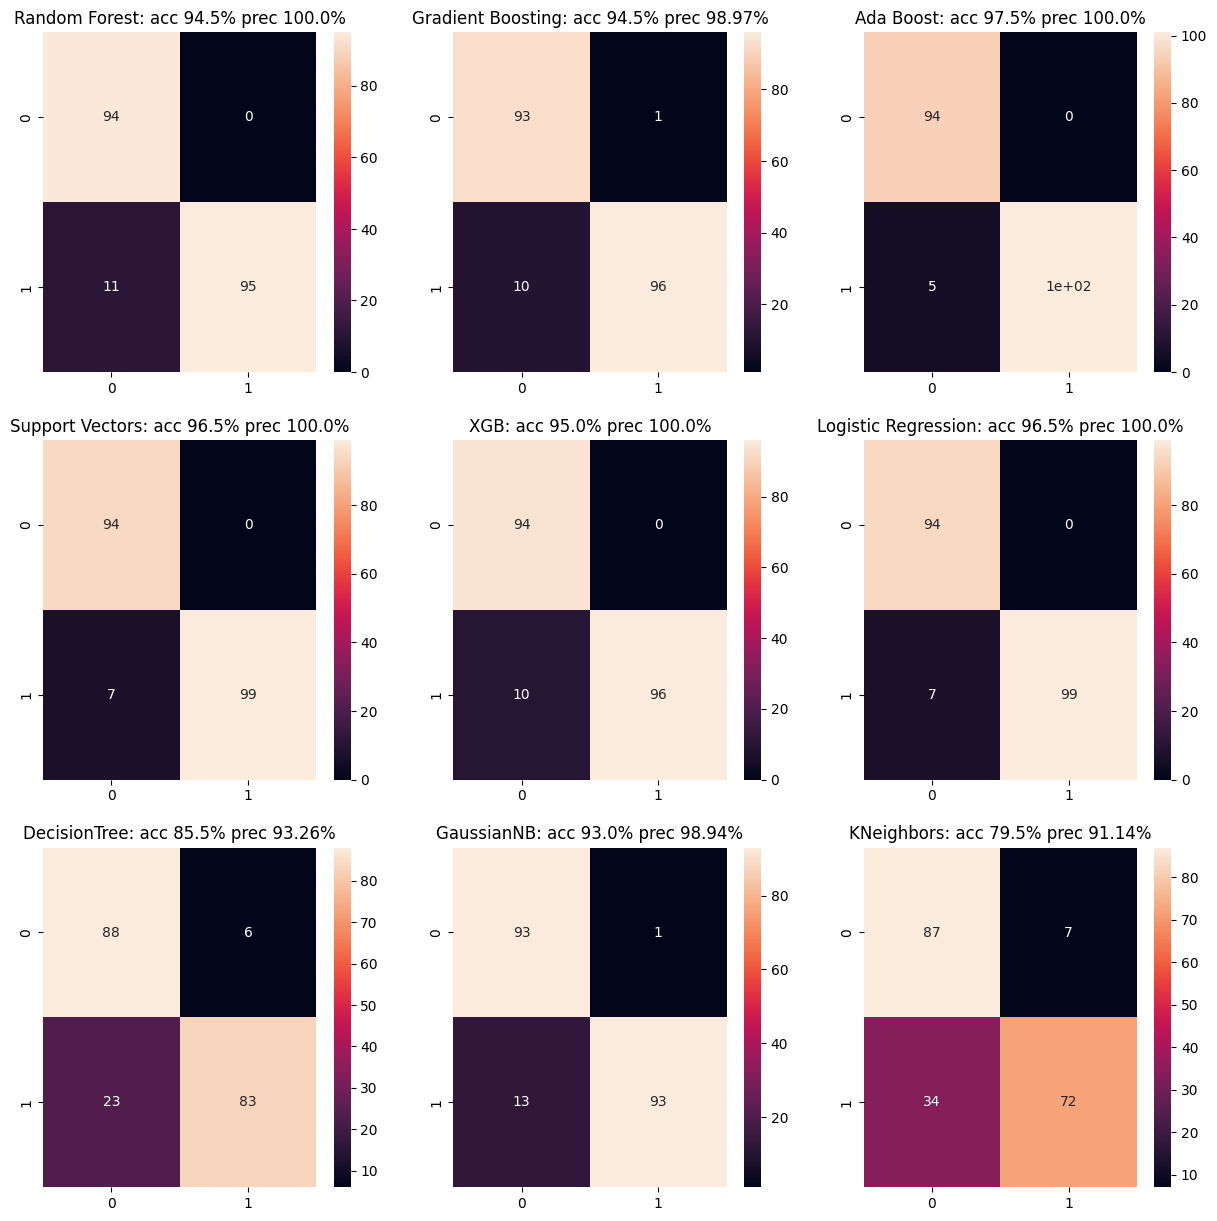

In [57]:
def training_pca10(model, name, ax):
    x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=42, test_size=0.2)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    # Calculating  accuracy score
    accuracy = accuracy_score(y_test, pred)
    # Calculating precision score
    precision = precision_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns_plot = sns.heatmap(cm, annot=True, ax=ax)

    ax.set_title("{}: acc {}% prec {}%".format(name, round(accuracy*100, 2), round(precision*100, 2) ))

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier(learning_rate=0.9)
abc = AdaBoostClassifier(learning_rate=0.9)
svc = SVC(C=0.9)
xgb = XGBClassifier(learning_rate=0.9)
lgr = LogisticRegression(C=0.9)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
kNN = KNeighborsClassifier(n_neighbors=2)


models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
index = 0
for i in range(3):
    for j in range(3):
        training_pca10(models[index], names[index], axes[i][j])
        index += 1

plt.savefig ("ConfusionMatrix_PCA10.png")

In [58]:
def test_model(x, y):
    mae_train = []
    mae_test = []
    rmse_train = []
    rmse_test = []

    x = pd.DataFrame(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
    rfc = RandomForestClassifier()
    gbc = GradientBoostingClassifier(learning_rate=0.9)
    abc = AdaBoostClassifier(learning_rate=0.9)
    svc = SVC(C=0.9)
    xgb = XGBClassifier(learning_rate=0.9)
    lgr = LogisticRegression(C=0.9)
    gNB = GaussianNB()
     # mNB = MultinomialNB()
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
    kNN = KNeighborsClassifier(n_neighbors=2)

    models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
    names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

    for model in models:
     model.fit(x_train, y_train)
     y_train_pred = model.predict(x_train)
     y_test_pred = model.predict(x_test)

     mae_train.append(mean_absolute_error(y_train, y_train_pred))
     mae_test.append(mean_absolute_error(y_test, y_test_pred))
     rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
     rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # mae_gen = np.array([names, mae_train, mae_test])
    metrics_gen = np.array([names, np.round(mae_train, 4), np.round(mae_test, 4), np.round(rmse_train, 4), np.round(rmse_test, 4)])

    # print (mae_gen, metrics_gen )
    # df_mae_gen = pd.DataFrame(mae_gen, index=[' ', 'mean_train', 'mean_test'])
    df_metrics_gen = pd.DataFrame(metrics_gen, index=[' ', 'mean_train', 'mean_test', 'rmse_train', 'rmse_test'])

    #print (df_mae_gen.to_markdown())
    print (df_metrics_gen.to_markdown())

    plt.plot(mae_train, 'o-', color='green', label='mae_train')
    plt.plot(mae_test, 'o-', color='red', label='mae_test')

    plt.plot(rmse_train, 'o-', color='blue', label='rmse_train')
    plt.plot(rmse_test, 'o-', color='black', label='rmse_test')

    plt.legend()
    plt.grid()
    plt.xlabel('Models')
    plt.ylabel('Mean Absolute Error & RMSE')
    # plt.title (str(model).split('(')[0]+'PCA_10')
    # plt.savefig (str(model).split('(')[0]+'PCA_10'+".png")
    plt.savefig ("Mean Absolute Error & RMSE with PCA_10"+".png")
    plt.show()

|            | 0             | 1                 | 2         | 3               | 4      | 5                   | 6            | 7          | 8          |
|:-----------|:--------------|:------------------|:----------|:----------------|:-------|:--------------------|:-------------|:-----------|:-----------|
|            | Random Forest | Gradient Boosting | Ada Boost | Support Vectors | XGB    | Logistic Regression | DecisionTree | GaussianNB | KNeighbors |
| mean_train | 0.0           | 0.0               | 0.01      | 0.0325          | 0.0    | 0.0362              | 0.1225       | 0.065      | 0.0825     |
| mean_test  | 0.055         | 0.055             | 0.025     | 0.035           | 0.05   | 0.035               | 0.145        | 0.07       | 0.205      |
| rmse_train | 0.0           | 0.0               | 0.1       | 0.1803          | 0.0    | 0.1904              | 0.35         | 0.255      | 0.2872     |
| rmse_test  | 0.2345        | 0.2345            | 0.1581    | 0.1871          | 0

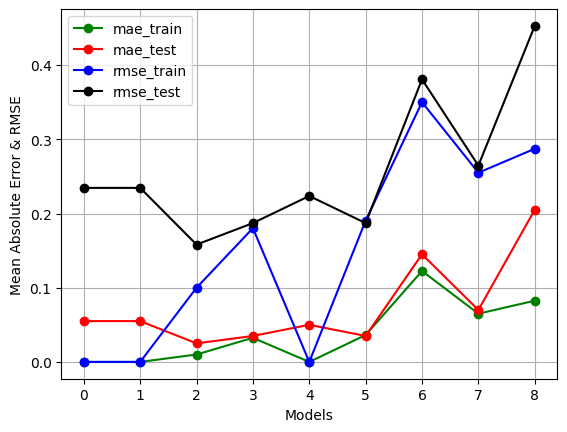

In [59]:
test_model(x_pca, y)

4.2.2	Linear discriminant analysis (LDA)

LDA is a popular linear dimensionality reduction technique that can find a linear combination of input features in a lower dimensional space while maximizing class separability.

The Linear Discriminant Analysis (LDA) is a method to separate the data points by learning relationships between the high dimensional data points and the learner line. It reduces the high dimensional data to linear dimensional data.

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
x_lda = lda.fit_transform(x, y)

In [61]:
x_lda.shape

(1000, 1)

In [62]:
exp_var = lda.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

print (exp_var)
print (cum_exp_var)

[100.]
[100.]


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, random_state=42, test_size=0.2)

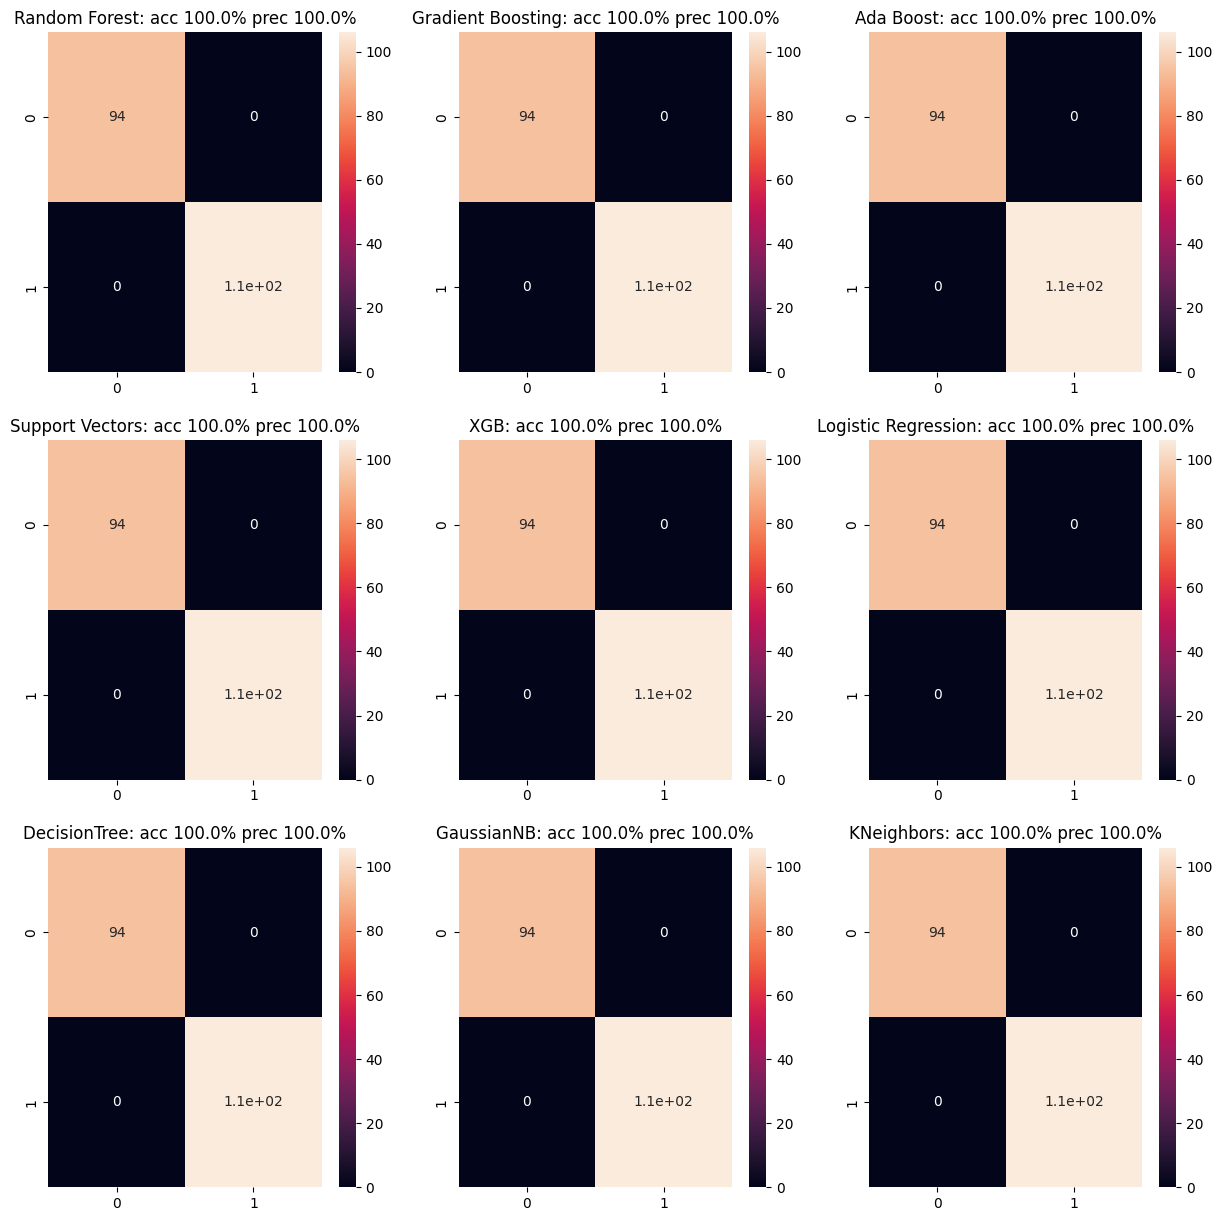

In [64]:
def training(model, name, ax):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    # Calculating  accuracy score
    accuracy = accuracy_score(y_test, pred)
    # Calculating precision score
    precision = precision_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns_plot = sns.heatmap(cm, annot=True, ax=ax)

    ax.set_title("{}: acc {}% prec {}%".format(name, round(accuracy*100, 2), round(precision*100, 2) ))

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier(learning_rate=0.9)
abc = AdaBoostClassifier(learning_rate=0.9)
svc = SVC(C=0.9)
xgb = XGBClassifier(learning_rate=0.9)
lgr = LogisticRegression(C=0.9)
gNB = GaussianNB()
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
kNN = KNeighborsClassifier(n_neighbors=2)

models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
index = 0
for i in range(3):
    for j in range(3):
        training(models[index], names[index], axes[i][j])
        index += 1

plt.savefig ("ConfusionMatrixLDA.png")

In [65]:
def test_model(x, y):
    mae_train = []
    mae_test = []
    rmse_train = []
    rmse_test = []

    x = pd.DataFrame(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
    rfc = RandomForestClassifier()
    gbc = GradientBoostingClassifier(learning_rate=0.9)
    abc = AdaBoostClassifier(learning_rate=0.9)
    svc = SVC(C=0.9)
    xgb = XGBClassifier(learning_rate=0.9)
    lgr = LogisticRegression(C=0.9)
    gNB = GaussianNB()
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
    kNN = KNeighborsClassifier(n_neighbors=2)

    models = [rfc, gbc, abc, svc, xgb, lgr, dt, gNB, kNN]
    names = ["Random Forest", "Gradient Boosting", "Ada Boost", "Support Vectors",
     "XGB", "Logistic Regression", "DecisionTree", "GaussianNB", "KNeighbors" ]

    for model in models:
     model.fit(x_train, y_train)
     y_train_pred = model.predict(x_train)
     y_test_pred = model.predict(x_test)

     mae_train.append(mean_absolute_error(y_train, y_train_pred))
     mae_test.append(mean_absolute_error(y_test, y_test_pred))
     rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
     rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    metrics_gen = np.array([names, np.round(mae_train, 4), np.round(mae_test, 4), np.round(rmse_train, 4), np.round(rmse_test, 4)])

    df_metrics_gen = pd.DataFrame(metrics_gen, index=[' ', 'mean_train', 'mean_test', 'rmse_train', 'rmse_test'])

    #print (df_mae_gen.to_markdown())
    print (df_metrics_gen.to_markdown())

    plt.plot(mae_train, 'o-', color='green', label='mae_train')
    plt.plot(mae_test, 'o-', color='red', label='mae_test')

    plt.plot(rmse_train, 'o-', color='blue', label='rmse_train')
    plt.plot(rmse_test, 'o-', color='black', label='rmse_test')

    plt.legend()
    plt.grid()
    plt.xlabel('Models')
    plt.ylabel('Mean Absolute Error & RMSE')
    plt.savefig ("Mean Absolute Error & RMSE without Regularisation Basic"+".png")
    plt.show()

|            | 0             | 1                 | 2         | 3               | 4      | 5                   | 6            | 7          | 8          |
|:-----------|:--------------|:------------------|:----------|:----------------|:-------|:--------------------|:-------------|:-----------|:-----------|
|            | Random Forest | Gradient Boosting | Ada Boost | Support Vectors | XGB    | Logistic Regression | DecisionTree | GaussianNB | KNeighbors |
| mean_train | 0.0           | 0.0               | 0.0       | 0.0012          | 0.0012 | 0.0025              | 0.0012       | 0.0012     | 0.0012     |
| mean_test  | 0.0           | 0.0               | 0.0       | 0.0             | 0.0    | 0.0                 | 0.0          | 0.0        | 0.0        |
| rmse_train | 0.0           | 0.0               | 0.0       | 0.0354          | 0.0354 | 0.05                | 0.0354       | 0.0354     | 0.0354     |
| rmse_test  | 0.0           | 0.0               | 0.0       | 0.0             | 0

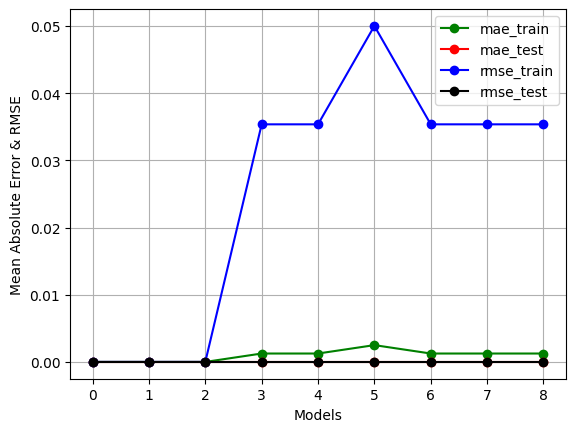

In [66]:
test_model(x_lda, y)

LDA is also used as a tool for classification, dimension reduction, and data visualization. 

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
LDA_pred=LDA.predict(x_test)

True Positive 100
True Negative 94
False Positive 0
False Negative 6


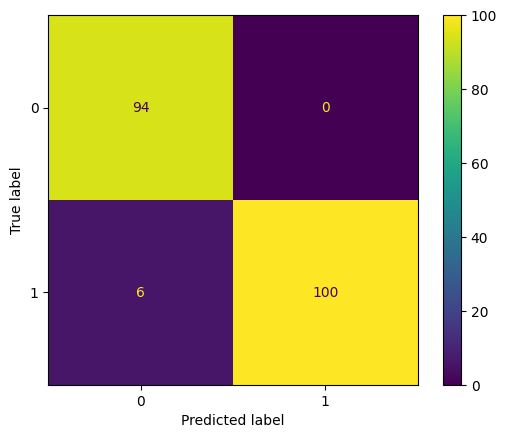

Accuracy score 0.97
Precision score 1.0


In [68]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(LDA_pred), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
ConfusionMatrixDisplay.from_predictions(y_test, LDA_pred)
plt.show()
# Calculating accuracy score
print("Accuracy score",accuracy_score(y_test, LDA_pred))

# Calculating precision score
print("Precision score",precision_score(y_test, LDA_pred))

mae_train is [0.02375] and mae_test is [0.03]
rmse_train is [0.1541103500742244] and rmse_test is [0.17320508075688773]


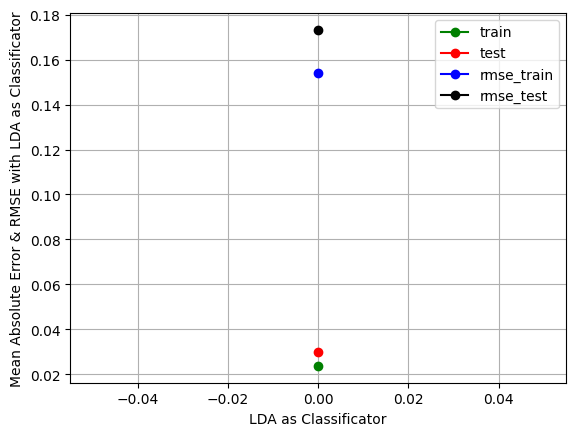

In [69]:
mae_train = []
mae_test = []
rmse_train = []
rmse_test = []


y_test_pred =LDA_pred
y_train_pred =LDA.predict(x_train)

mae_train.append(mean_absolute_error(y_train, y_train_pred))
mae_test.append(mean_absolute_error(y_test, y_test_pred))

rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

print(f"mae_train is {mae_train} and mae_test is {mae_test}")
print(f"rmse_train is {rmse_train} and rmse_test is {rmse_test}")

plt.plot(mae_train, 'o-', color='green', label='train')
plt.plot(mae_test, 'o-', color='red', label='test')

plt.plot(rmse_train, 'o-', color='blue', label='rmse_train')
plt.plot(rmse_test, 'o-', color='black', label='rmse_test')

plt.legend()
plt.grid()
plt.xlabel('LDA as Classificator')
plt.ylabel('Mean Absolute Error & RMSE with LDA as Classificator')
plt.savefig ("Mean Absolute Error & RMSE with LDA as Classificato"+".png")
plt.show()